## LIBRARIES & FILES

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [2]:
import os
import pickle
from sys import exit

for dirname, _, filenames in os.walk('./lmg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./lmg/train.pkl
./lmg/train_cc2ftr.pkl
./lmg/test_cc2ftr.pkl
./lmg/.DS_Store
./lmg/test.pkl
./lmg/dict.pkl


In [3]:
df = pd.read_csv('testdata1.csv')
df.sort_values("Given Log Message", inplace=True)
df

,Code Change,Given Log Message,Predicted Log Message,BLEU-4 Score
2139,mmm a / plugins / git4idea / src / git4idea / ...,"( If there is no error , do change the target","if null , check version .",0.085533
555,mmm a / src / main / org / codehaus / groovy /...,@ Deprecated does not have effect in Groovy,@ deprecated does not have effect in groovy,0.080188
971,new file mode 100644 <nl> index 000000000 . . ...,ACT - 1366 Added image for userguide,fix broken image in docs,0.000000
1340,mmm a / services / java / com / android / serv...,Accessibility focus should not affect the curr...,fix monochromacy simulation,0.000000
635,old mode 100644 <nl> new mode 100755 <nl>,Activated execution flag on synch . sh ( # 2025 ),made ci_macosx .,0.106917
...,...,...,...,...
1790,mmm a / pom . xml <nl> ppp b / pom . xml <nl> ...,using java5 compatible version of guava,upgraded guava to 20,0.000000
703,mmm a / java / java - tests / testSrc / com / ...,wait a bit,remove debug output,0.000000
503,mmm a / run - all - examples <nl> ppp b / run ...,wait more and push more elements in to flume,add java example to run - all script,0.000000
1922,deleted file mode 100644 <nl> index 379f296 . ...,"we don ' t need screeshot , it ' s better to p...",remove uneeded icon .,0.000000


## TRAIN CSV

In [4]:
train = np.array(pickle.load(open('./lmg/train.pkl', 'rb')))   
train_df = pd.DataFrame(train).T
train_df.columns = ['LMG', 'DIFF']
train_df.sort_values("LMG", inplace=True)
train_df = train_df.assign(LEN = train_df['LMG'].str.split().str.len(), 
                           W1 = train_df['LMG'].str.split().str[0],
                           W2 = train_df['LMG'].str.split().str[1])
train_df

,LMG,DIFF,LEN,W1,W2
8338,""" Updating samples to reflect recent changes . """,mmm a / java / README <nl> ppp b / java / READ...,9,"""",Updating
11082,""" Updating samples to reflect recent changes . """,mmm a / python / upload_banner . py <nl> ppp b...,9,"""",Updating
15142,""" Updating samples to reflect recent changes . """,mmm a / java / src / main / resources / youtub...,9,"""",Updating
5224,""" Updating samples to reflect recent changes . """,mmm a / php / captions . php <nl> ppp b / php ...,9,"""",Updating
11093,""" fixed "" the Apple logo success button issue",Binary files a / images / buttons_rounded . pn...,9,"""",fixed
...,...,...,...,...,...
15453,xVariables Listbox detects high NA counts and ...,Binary files a / excel / H2O . xlsm and b / ex...,9,xVariables,Listbox
2930,yahoo connecting gif,new file mode 100644 <nl> index 000000000 . . ...,3,yahoo,connecting
4117,"yeah , I just did that",mmm a / VERSION . txt <nl> ppp b / VERSION . t...,6,yeah,","
21247,yet another resolve bug,Binary files a / mockJDK - 1 . 5 / jre / lib /...,4,yet,another


In [5]:
n = 75
freq_w1, counts = train_df.W1.value_counts()[:n].index.tolist(), train_df.W1.value_counts()[:n].tolist()
freq_dict = dict(zip(freq_w1, counts))

print(sum(freq_dict.values()))

17265


In [6]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()
stm = []
for w in freq_w1:
    if ps.stem(w) not in stm:
        stm.append(ps.stem(w))

stm_dict = dict.fromkeys(stm,0)
for w in freq_w1:
    stm_dict[ps.stem(w)] += freq_dict[w]

stm_dict['add'] += stm_dict['ad']
del(stm_dict['ad'])

print(sum(stm_dict.values()))
print(len(stm_dict.keys()))

stm_dict = sorted(stm_dict.items(), key=lambda x: x[1], reverse=True)
print(stm_dict)

17265
33
[('add', 4563), ('fix', 2890), ('updat', 2392), ('remov', 2126), ('lp', 800), ('set', 437), ('ignor', 425), ('bump', 395), ('prepar', 375), ('chang', 373), ('upgrad', 289), ('make', 282), ('don', 242), ('revert', 198), ('use', 197), ('move', 154), ('delet', 150), ('renam', 117), ('lrqa', 91), ('creat', 90), ('push', 89), ('disabl', 88), ('build', 82), ('miss', 54), ('Do', 51), ('smack', 49), ('enabl', 43), ('allow', 43), ('includ', 41), ('made', 39), ('replac', 36), ('do', 34), ('minecraftforg', 30)]


3    2848
4    2556
5    2527
6    2524
8    1999
Name: LEN, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


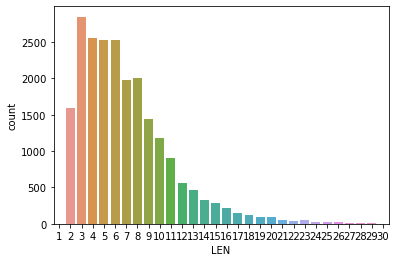

In [7]:
print(train_df.LEN.value_counts().head())
print(sns.countplot(x='LEN', data=train_df))

In [8]:
train_df.to_csv('sorted_train.csv', index=False)

## TEST CSV

In [9]:
test = np.array(pickle.load(open('./lmg/test.pkl', 'rb')))   
test_df = pd.DataFrame(test).T
test_df.columns = ['LMG', 'DIFF']
test_df.sort_values("LMG", inplace=True)
test_df['PRED'] = df['Predicted Log Message'].values
test_df = test_df.assign(LEN = test_df['LMG'].str.split().str.len(),
                         W1 = test_df['LMG'].str.split().str[0],
                         W2 = test_df['LMG'].str.split().str[1])
test_df

,LMG,DIFF,PRED,LEN,W1,W2
2139,"( If there is no error , do change the target",mmm a / plugins / git4idea / src / git4idea / ...,"if null , check version .",11,(,If
555,@ Deprecated does not have effect in Groovy,mmm a / src / main / org / codehaus / groovy /...,@ deprecated does not have effect in groovy,8,@,Deprecated
971,ACT - 1366 Added image for userguide,new file mode 100644 <nl> index 000000000 . . ...,fix broken image in docs,7,ACT,-
1340,Accessibility focus should not affect the curr...,mmm a / services / java / com / android / serv...,fix monochromacy simulation,10,Accessibility,focus
635,Activated execution flag on synch . sh ( # 2025 ),old mode 100644 <nl> new mode 100755 <nl>,made ci_macosx .,11,Activated,execution
...,...,...,...,...,...,...
1790,using java5 compatible version of guava,mmm a / pom . xml <nl> ppp b / pom . xml <nl> ...,upgraded guava to 20,6,using,java5
703,wait a bit,mmm a / java / java - tests / testSrc / com / ...,remove debug output,3,wait,a
503,wait more and push more elements in to flume,mmm a / run - all - examples <nl> ppp b / run ...,add java example to run - all script,9,wait,more
1922,"we don ' t need screeshot , it ' s better to p...",deleted file mode 100644 <nl> index 379f296 . ...,remove uneeded icon .,17,we,don


In [10]:
test_df.sort_values("LEN", inplace=True)
test_df

,LMG,DIFF,PRED,LEN,W1,W2
184,Fixes,mmm a / src / rajawali / Geometry3D . java <nl...,fixed a bug with backsided objects .,1,Fixes,NaN
632,update CHANGES,mmm a / CHANGES . txt <nl> ppp b / CHANGES . t...,update changes,2,update,CHANGES
1297,update screenshot,Binary files a / screenshot / screenshot . png...,update screenshot,2,update,screenshot
922,Create README,new file mode 100644 <nl> index 0000000 . . 8f...,create readme - zh .,2,Create,README
477,adding libtool,mmm a / manual / README . asciidoc <nl> ppp b ...,adding xsltproc,2,adding,libtool
...,...,...,...,...,...,...
268,Add a note that states that you have to use @ ...,mmm a / factory / README . md <nl> ppp b / fac...,"add info about "" android - appmsg - gradle - s...",26,Add,a
2200,"Revert "" LPS - 57534 Should not use full path ...",mmm a / sql / sql . properties <nl> ppp b / sq...,"lps - 57534 should not use full path , but ci ...",26,Revert,""""
150,GRAILS - 5883 - fixed bug in domain class mock...,mmm a / src / java / grails / test / MockUtils...,grails - 6290 removed println,28,GRAILS,-
913,Replaced calls to HttpServletRequest . getSche...,mmm a / src / main / java / spark / Request . ...,add suppresswarnings annotation,29,Replaced,calls


In [11]:
n = 75
freq_w1, counts = test_df.W1.value_counts()[:n].index.tolist(), test_df.W1.value_counts()[:n].tolist()
freq_dict = dict(zip(freq_w1, counts))

print(sum(freq_dict.values()))

1723


In [12]:
stm = []
for w in freq_w1:
    if ps.stem(w) not in stm:
        stm.append(ps.stem(w))

stm_dict = dict.fromkeys(stm,0)
for w in freq_w1:
    stm_dict[ps.stem(w)] += freq_dict[w]

stm_dict['add'] += stm_dict['ad']
del(stm_dict['ad'])

print(sum(stm_dict.values()))
print(len(stm_dict.keys()))

stm_dict = sorted(stm_dict.items(), key=lambda x: x[1], reverse=True)
print(stm_dict)

1723
38
[('add', 453), ('fix', 267), ('updat', 230), ('remov', 206), ('lp', 91), ('bump', 51), ('set', 50), ('prepar', 36), ('ignor', 31), ('chang', 30), ('upgrad', 29), ('make', 24), ('use', 20), ('renam', 19), ('creat', 16), ('don', 15), ('move', 15), ('revert', 14), ('lrqa', 12), ('delet', 12), ('push', 9), ('minecraftforg', 7), ('disabl', 7), ('gh', 7), ('build', 7), ('Do', 6), ('built', 6), ('idea', 6), ('grail', 6), ('smack', 5), ('do', 5), ('miss', 5), ('sonar', 5), ('correct', 5), ('improv', 4), ('keep', 4), ('allow', 4), ('put', 4)]


6    269
4    264
3    262
5    249
7    211
Name: LEN, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


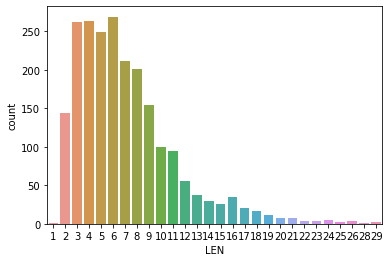

In [13]:
print(test_df.LEN.value_counts().head())
print(sns.countplot(x='LEN', data=test_df))

In [14]:
test_df.to_csv('sorted_test.csv', index=False)